In [463]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import plotly_express as px
import plotly.io as pio
from sklearn import preprocessing
import pandas_profiling
import datetime
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import warnings
import math
import plotly.express as px

warnings.filterwarnings("ignore")


In [11]:
df_count_day_type = pd.read_csv('./data_joao/df_count_day_type_modificado.csv',sep=",",parse_dates=['judgmentDate'])
df_count_week_day_type = pd.read_csv('./data_joao/df_count_week_day_type_modificado.csv',sep=",")
df_count_year_month_type = pd.read_csv('./data_joao/df_count_year_month_type_modificado.csv',sep=",")

df_count_day_type.index = pd.to_datetime(df_count_day_type['judgmentDate'])
df_count_year_month_type.index = pd.to_datetime(df_count_year_month_type['yearMonth'])
#df_count_week_day_type.index = pd.to_datetime(df_count_week_day_type['weekDay'])

del df_count_day_type['Unnamed: 0']
del df_count_week_day_type['Unnamed: 0']
del df_count_year_month_type['Unnamed: 0']
del df_count_day_type['judgmentDate']
del df_count_year_month_type['yearMonth']

dataFrames = [df_count_day_type,df_count_week_day_type,df_count_year_month_type]
for df in dataFrames:
    display(df.head(2))
    display(df.index)

,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-01-03,Agravo de Instrumento,2,0,DiaSemana,3,1,2000,False
2000-01-06,Agravo de Instrumento,1,3,DiaSemana,6,1,2000,False


DatetimeIndex(['2000-01-03', '2000-01-06', '2000-01-10', '2000-01-11',
               '2000-01-20', '2000-01-24', '2000-02-02', '2000-02-06',
               '2000-02-07', '2000-02-08',
               ...
               '2017-12-21', '2017-12-21', '2017-12-27', '2017-12-28',
               '2017-12-28', '2017-12-28', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29'],
              dtype='datetime64[ns]', name='judgmentDate', length=63765, freq=None)

,weekDay,type,count
0,Sun,Ação Civil Pública,2
1,Sun,Ação Rescisória,9


RangeIndex(start=0, stop=513, step=1)

,type,count
yearMonth,,
2000-01-01,Agravo de Instrumento,12
2000-02-01,Ação Rescisória,1


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-02-01', '2000-02-01',
               '2000-02-01', '2000-02-01', '2000-02-01', '2000-02-01',
               '2000-02-01', '2000-02-01',
               ...
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01'],
              dtype='datetime64[ns]', name='yearMonth', length=7455, freq=None)


<div class="alert alert-info"><h1> FORECASTING
</h1>
    <hr/>
    <h3> 
</h3>
</div>

In [212]:
dfTypes = df_count_year_month_type['2000-01-01':].groupby('type').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index()
display(dfTypes.head(3))
#print(dfTop10Types['type'])
dfTypes = dfTypes['type']
dfTypes

,type,count
0,Apelação Cível,1619859
1,Agravo de Instrumento,1367460
2,Embargos de Declaração,813282


0                           Apelação Cível
1                    Agravo de Instrumento
2                   Embargos de Declaração
3                            Recurso Cível
4                                   Agravo
                      ...                 
114                                Arresto
115    Declaração de Inconstitucionalidade
116                      Recurso de Agravo
117                               Oposição
118                 Arresto Hipoteca Legal
Name: type, Length: 119, dtype: object

In [195]:
df_YM_Forecast = df_count_year_month_type[df_count_year_month_type['type']=='Apelação Cível']
df_YM_Forecast = df_YM_Forecast[['type','count']]


df_day_Forecast = df_count_day_type[df_count_day_type['type']=='Apelação Cível']
df_day_Forecast = df_day_Forecast[['type','count']]

#df_Holt_day_Forecast = df_Holt_day[df_Holt_day['type']=='Apelação Cível']

display(df_Holt_YM_Forecast.head(2))

,type,count
yearMonth,,
2000-02-01,Apelação Cível,151
2000-03-01,Apelação Cível,279


In [16]:
df_YM_Forecast.dropna(inplace=True)
df_YM_Forecast.index.asfreq = 'A'
df_YM_Forecast.tail()


df_day_Forecast.fillna(0,inplace=True)
df_day_Forecast.index.asfreq = 'MS'
df_day_Forecast.tail()

df_YM_Forecast=df_YM_Forecast[['type','count']]
df_day_Forecast = df_day_Forecast[['type','count']]

In [19]:
print(df_YM_Forecast.count()['count'])
quantidade =df_YM_Forecast.count()['count']
percentForTesting = math.ceil((27*quantidade)/100)
percentageForTrain = math.floor(quantidade-percentForTesting)
print(percentForTesting)
print(percentageForTrain)

215
59
156


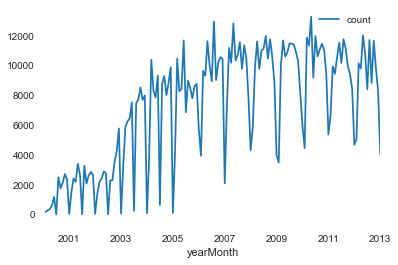

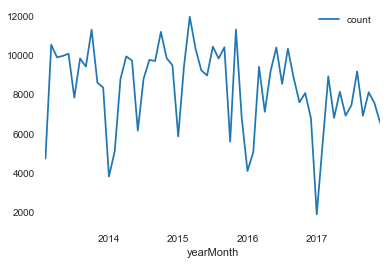

In [23]:
trainY = df_YM_Forecast.iloc[:percentageForTrain]
testY = df_YM_Forecast.iloc[percentageForTrain:]
trainY.plot(legend=True,label='Train');
testY.plot(legend=True,label='Test');

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
trainY = trainY[['count']]
testY = testY[['count']]

print('Treino')
display(trainY['count'].head(1))
display(trainY['count'].tail(1))

print('Teste')
display(testY['count'].head(1))
display(testY['count'].tail(1))

Treino


yearMonth
2000-02-01    151
Name: count, dtype: int64

yearMonth
2013-01-01    4051
Name: count, dtype: int64

Teste


yearMonth
2013-02-01    4725
Name: count, dtype: int64

yearMonth
2017-12-01    6546
Name: count, dtype: int64

Numero de predicoes 59


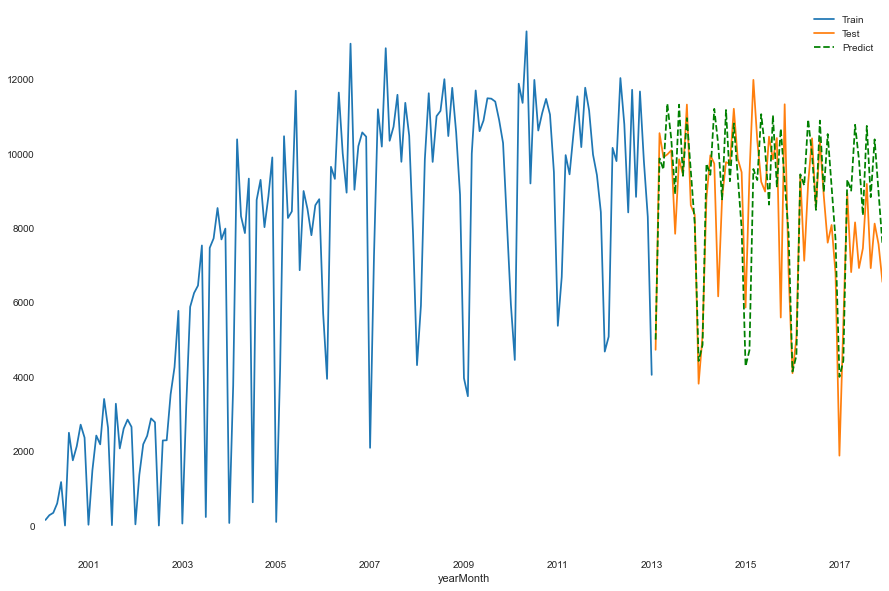

In [58]:
fittedModel = ExponentialSmoothing(trainY['count'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fittedModel.forecast(percentForTesting).rename('HW Forecast')

print('Numero de predicoes',test_predictions.count())
#display(test_predictions.head(1))
trainY['count'].plot(legend=True,label='Train',figsize=(15,10));
testY['count'].plot(legend=True,label='Test');
test_predictions.plot(color='green',linestyle='dashed',legend=True,label='Predict');

In [59]:
test_predictions = fittedModel.forecast(percentForTesting).rename('HW Forecast')
display(test_predictions.count())
display(test_predictions.head(1))

59

2013-02-01    4997.022075
Freq: MS, Name: HW Forecast, dtype: float64

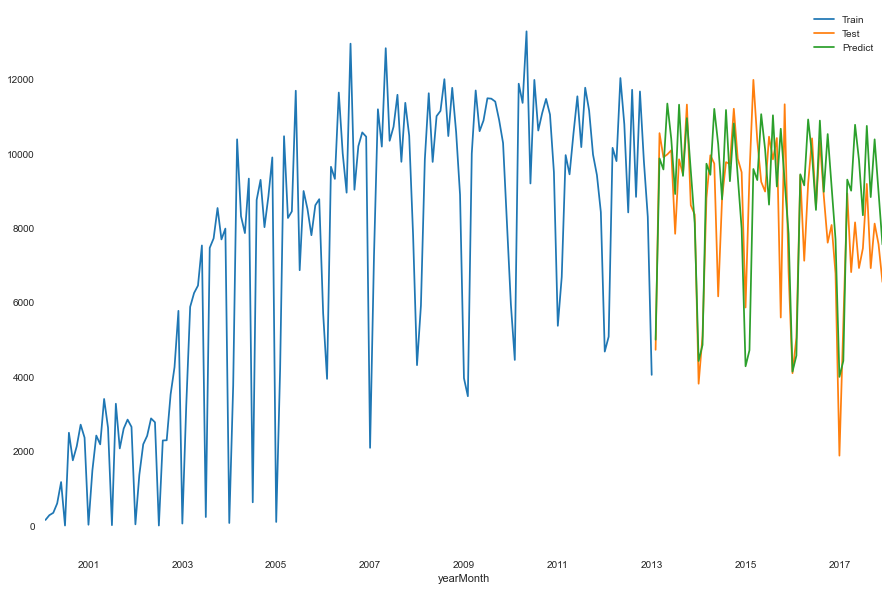

In [60]:
trainY['count'].plot(legend=True,label='Train',figsize=(15,10))
testY['count'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predict');

In [61]:
display(testY.count())
display(test_predictions.count())

count    59
dtype: int64

59

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
display(testY.describe())

print('Mean Squared error:',mean_squared_error(testY,test_predictions))

test_predictions = fittedModel.forecast(percentForTesting)
print('Mean absolute error:',mean_absolute_error(testY,test_predictions))

print('Sqrt(mean absolute error):',np.sqrt(mean_absolute_error(testY,test_predictions)))

,count
count,59.000000
mean,8349.983051
std,2104.881572
min,1880.000000
25%,6919.500000
50%,8861.000000
75%,9850.500000
max,11977.000000


Mean Squared error: 2796231.3244948136
Mean absolute error: 1270.216993604008
Sqrt(mean absolute error): 35.64010372605568


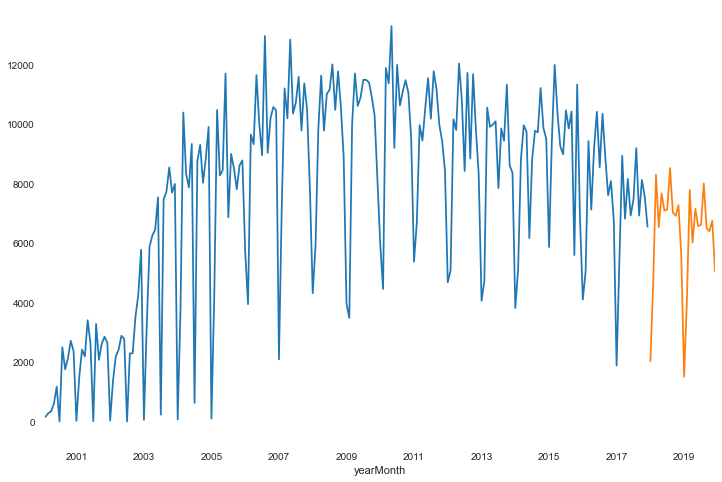

In [76]:
final_model = ExponentialSmoothing(df_YM_Forecast['count'],trend='add',seasonal='add',seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(24)
df_YM_Forecast['count'].plot(figsize=(12,8))
forecast_predictions.plot()

In [78]:
from statsmodels.tsa.statespace.tools import diff

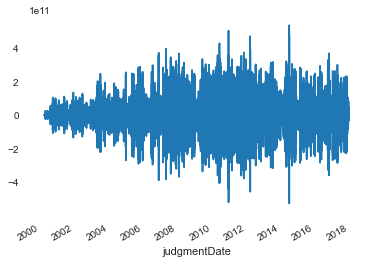

In [102]:
diff(df_day_Forecast['count'],k_diff=31).plot()

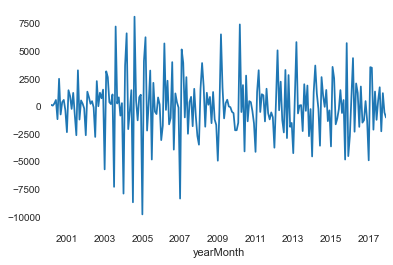

In [103]:
diff(df_YM_Forecast['count'],k_diff=1).plot()


<div class="alert alert-info"><h2> ACF e PACF
</h2>
    <hr/>
    
</div>

In [105]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [156]:
df_day_Agravo = df_count_day_type[df_count_day_type['type'] == 'Agravo de Instrumento']
df_day_Apelacao = df_count_day_type[df_count_day_type['type'] == 'Apelação Cível']

df_YM_Agravo = df_count_year_month_type[df_count_year_month_type['type'] == 'Agravo de Instrumento']
df_YM_Apelacao = df_count_year_month_type[df_count_year_month_type['type'] == 'Apelação Cível']


                  
display(df_day_Agravo.head(1))
display(df_day_Apelacao.head(1))

,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-01-03,Agravo de Instrumento,2,0,DiaSemana,3,1,2000,False


,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-02-06,Apelação Cível,1,6,FimSemana,6,2,2000,False


In [162]:
acf(df_day_Agravo['count'])[:3]

array([1.        , 0.53862853, 0.09008915])

In [144]:
print(pacf_yw(df_day_Agravo['count'], nlags=4,method='mle'))
print(pacf_ols(df_day_Agravo['count'], nlags=4))
#pacf_yw(df_day_Agravo['count'], nlags=4,method='unbiased')

[ 1.          0.53862853 -0.28178246 -0.16181341  0.16119608]
[ 1.          0.53870533 -0.28175263 -0.16181463  0.16125166]


In [122]:
from pandas.plotting import lag_plot

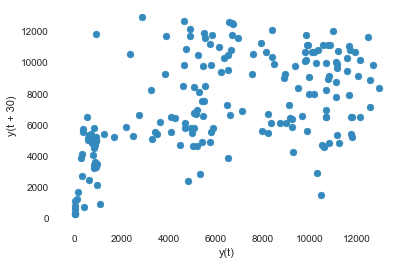

In [164]:
#lag_plot(df_day_Agravo['count'],lag=30)
lag_plot(df_YM_Agravo['count'],lag=30)

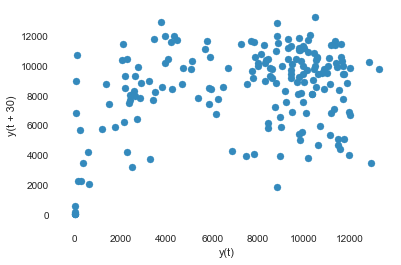

In [165]:
lag_plot(df_YM_Apelacao['count'],lag=30)

In [200]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

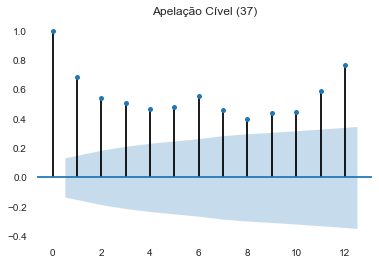

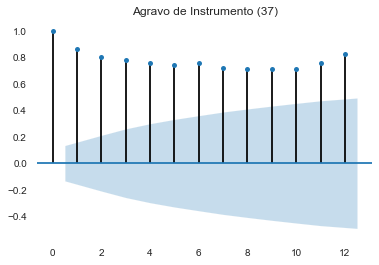

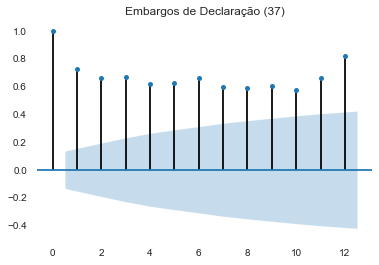

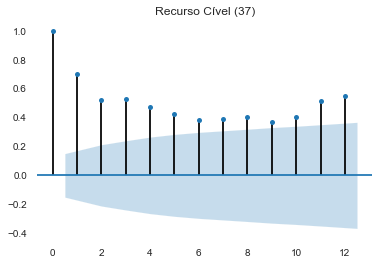

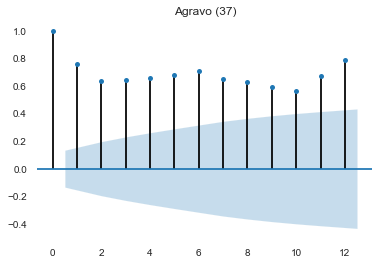

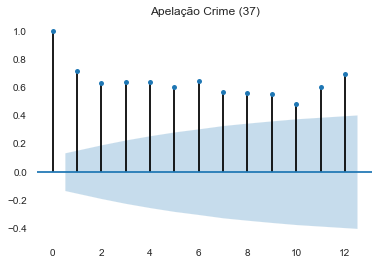

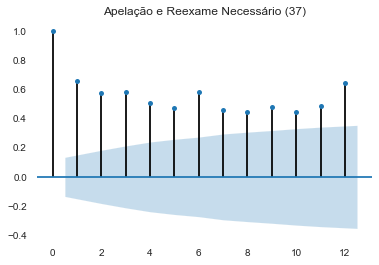

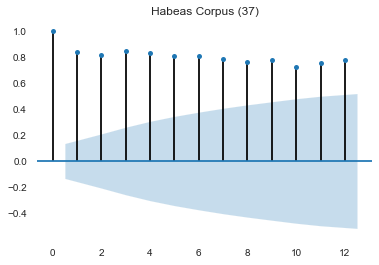

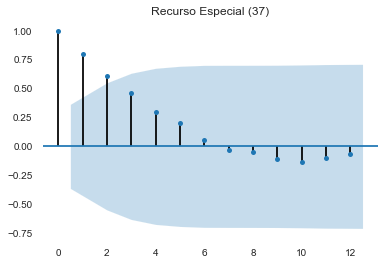

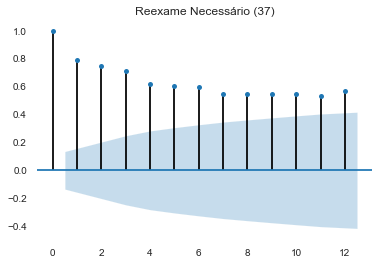

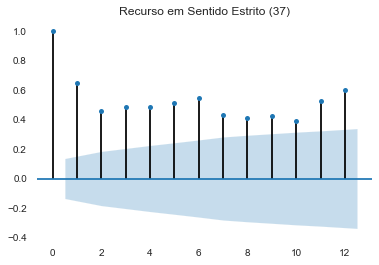

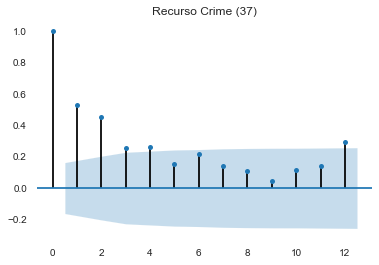

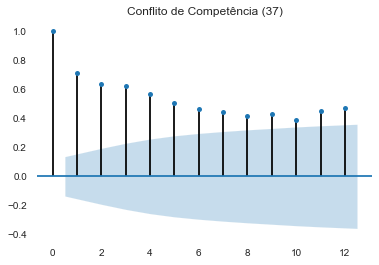

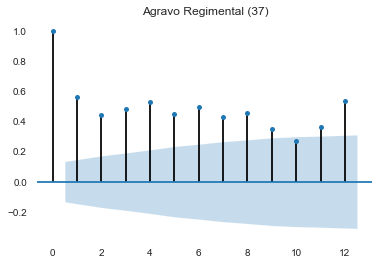

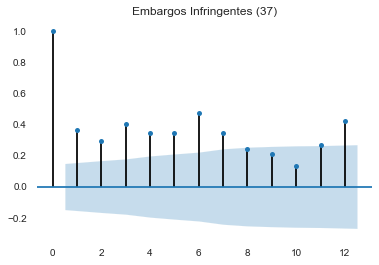

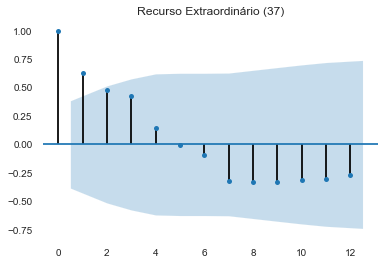

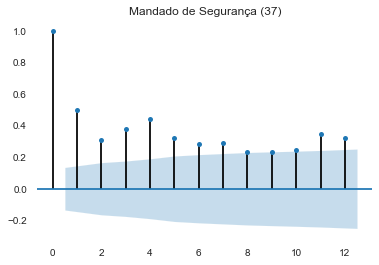

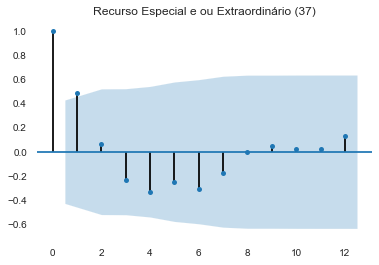

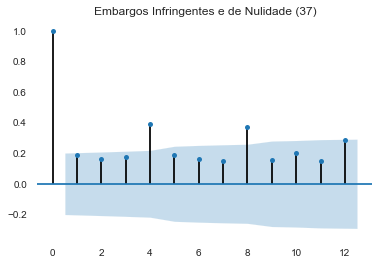

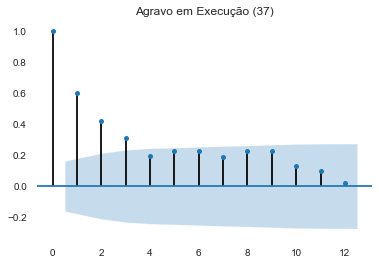

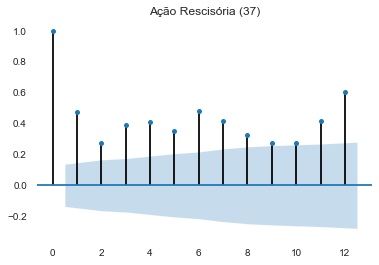

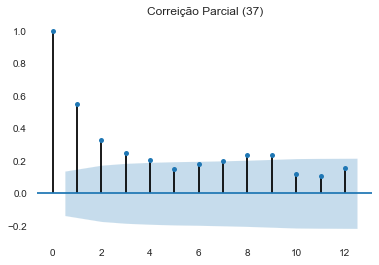

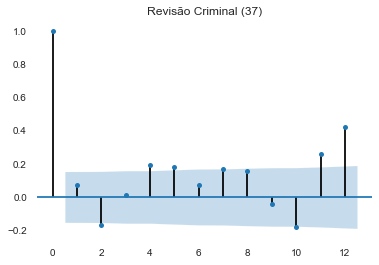

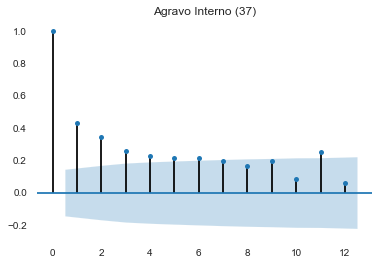

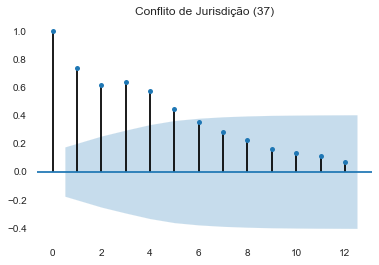

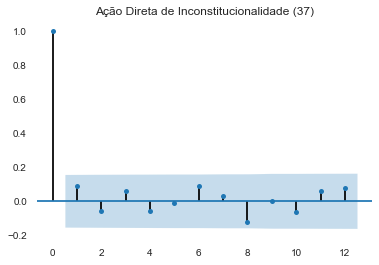

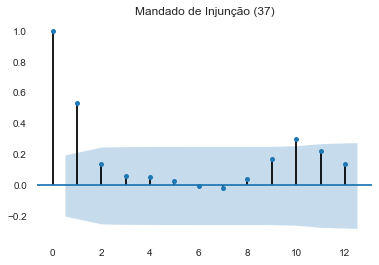

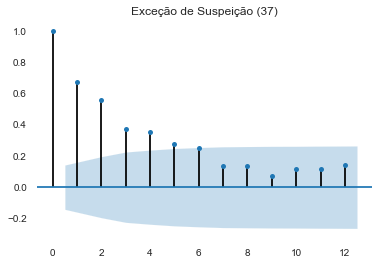

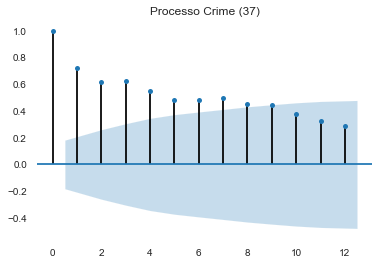

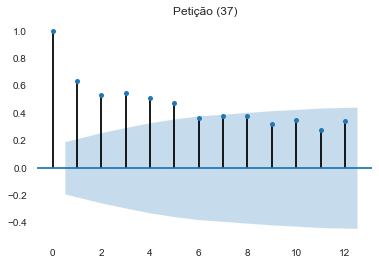

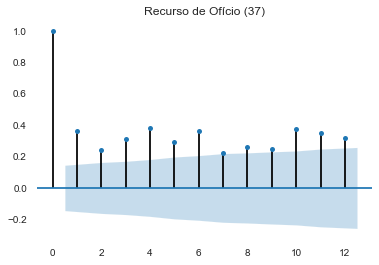

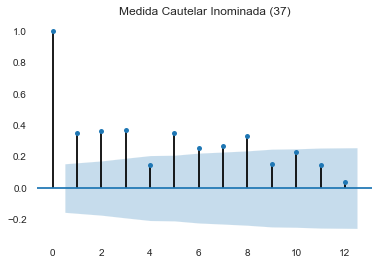

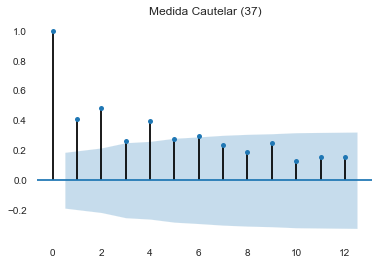

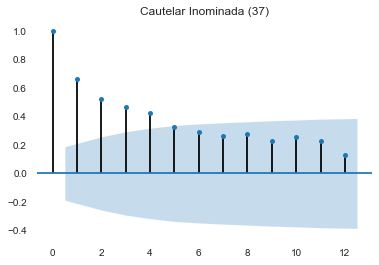

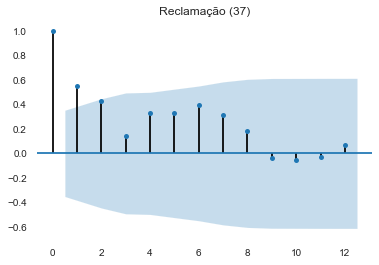

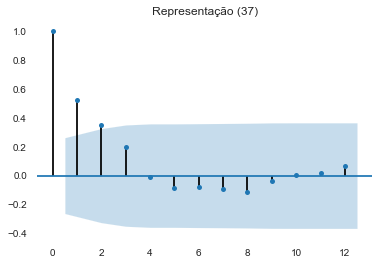

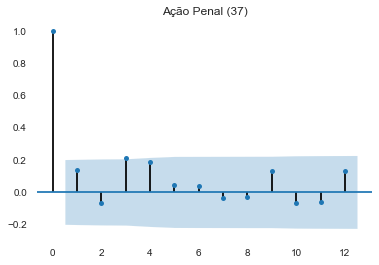

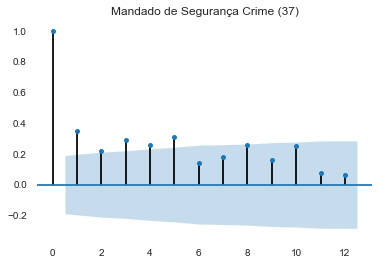

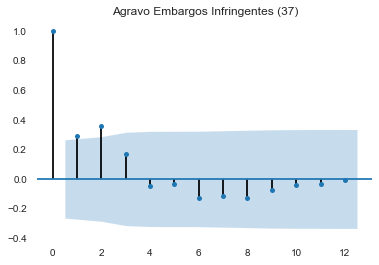

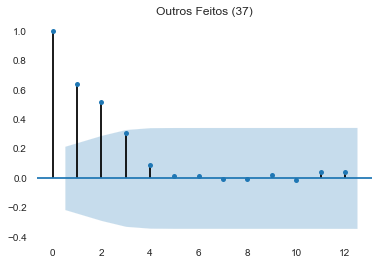

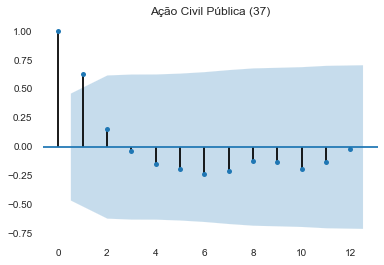

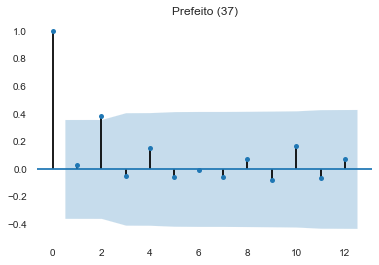

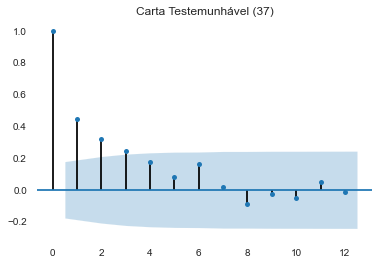

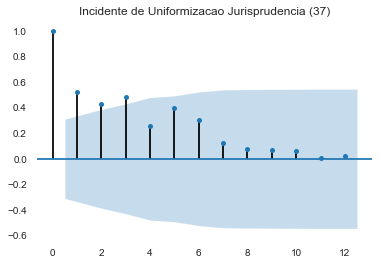

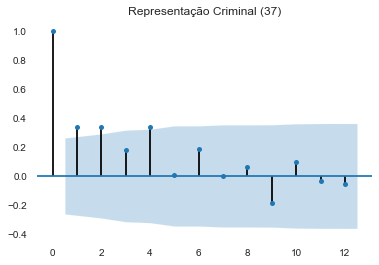

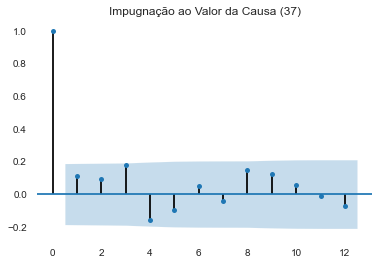

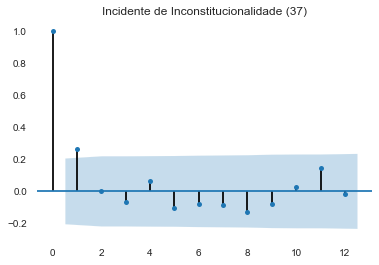

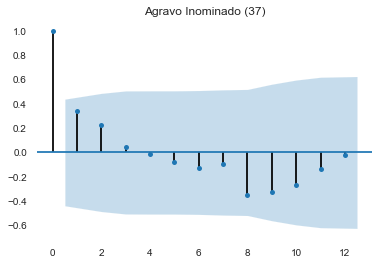

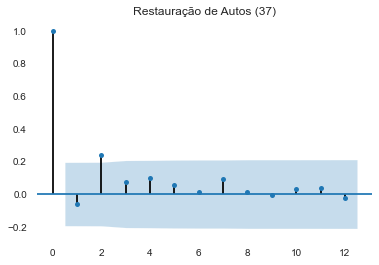

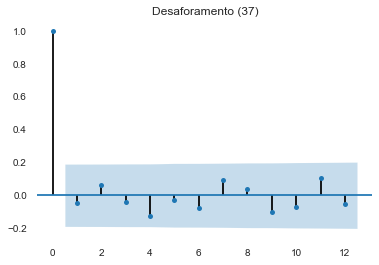

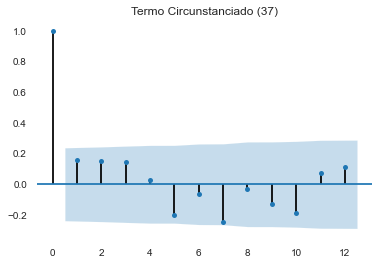

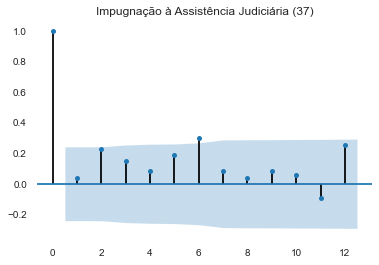

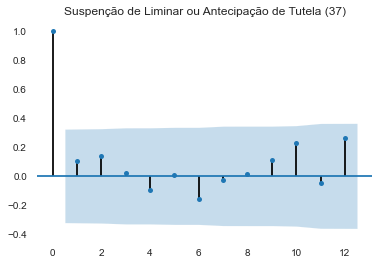

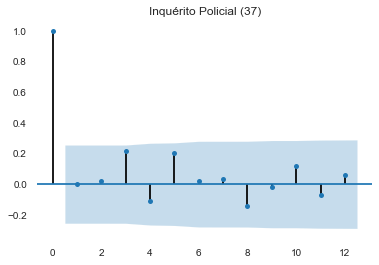

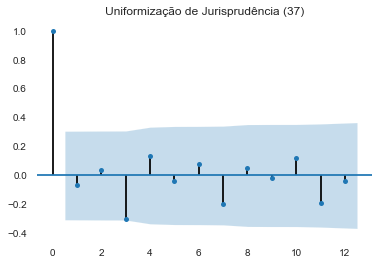

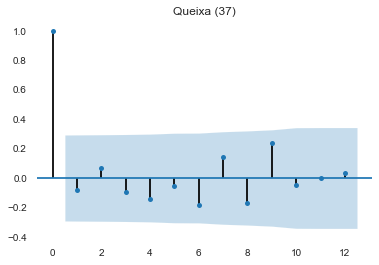

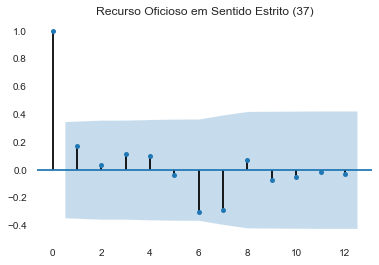

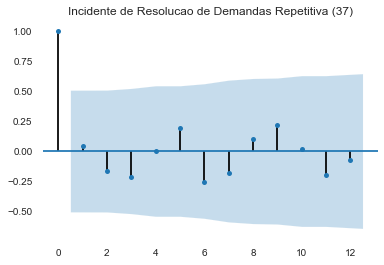

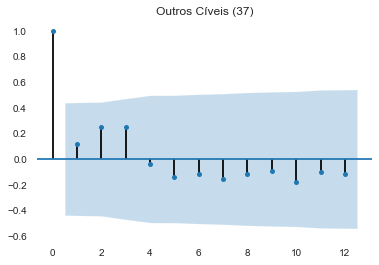

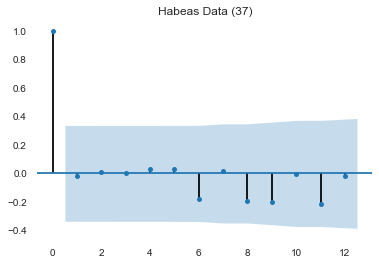

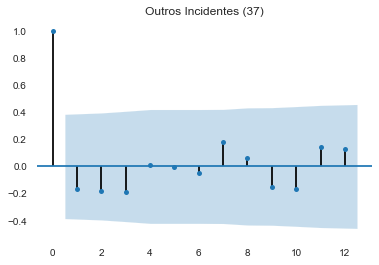

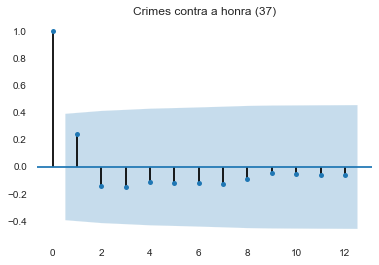

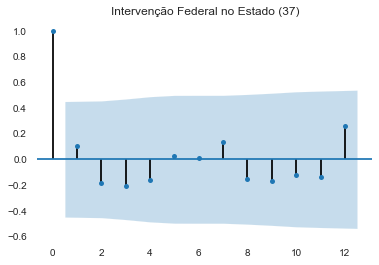

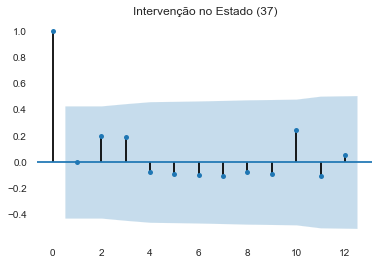

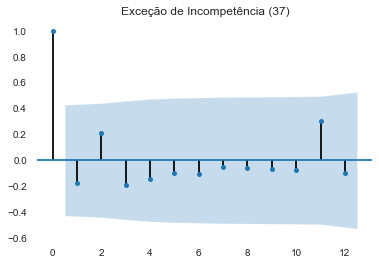

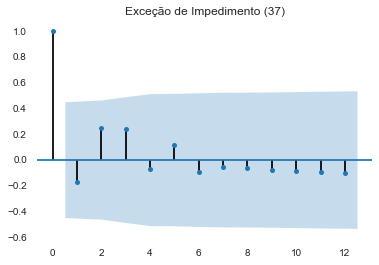

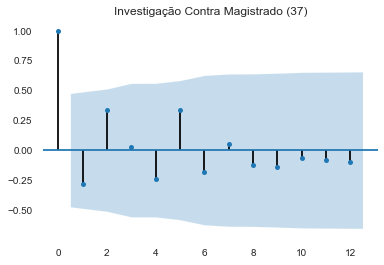

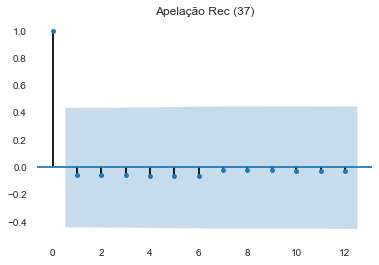

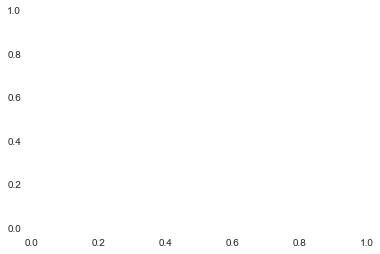

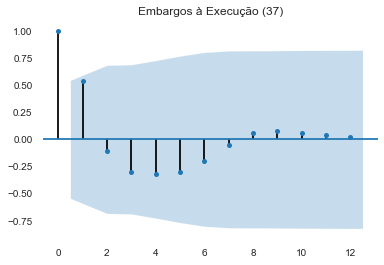

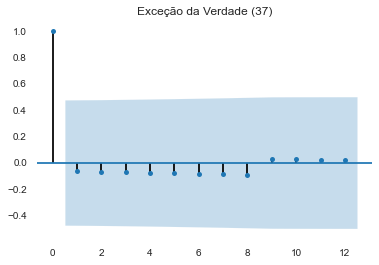

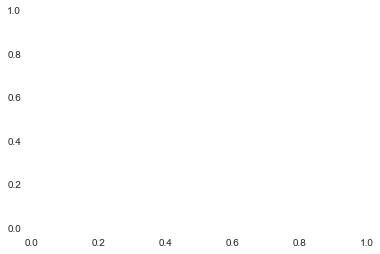

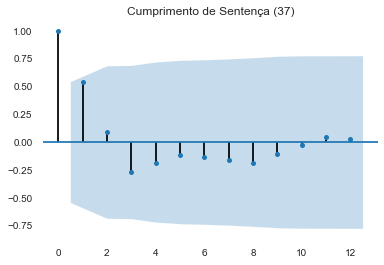

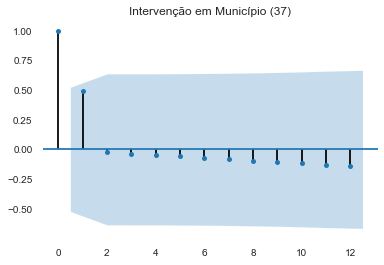

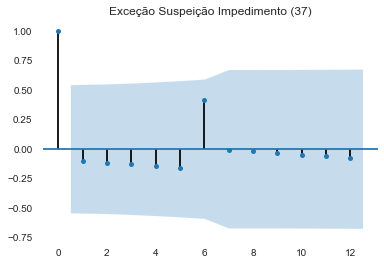

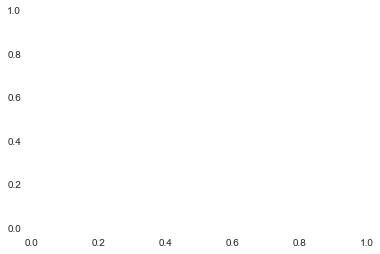

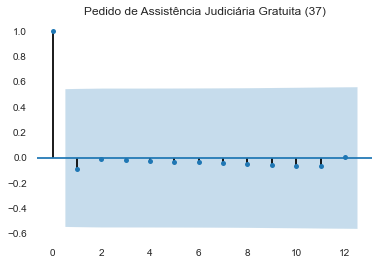

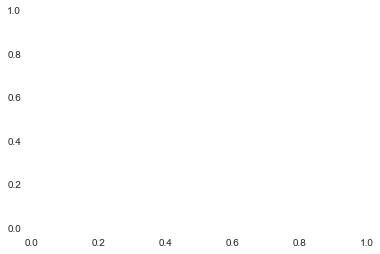

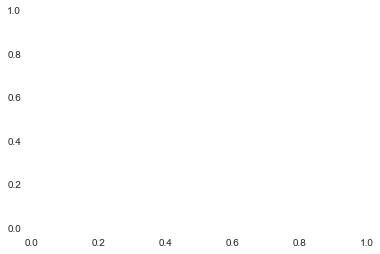

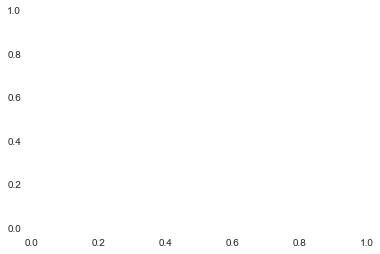

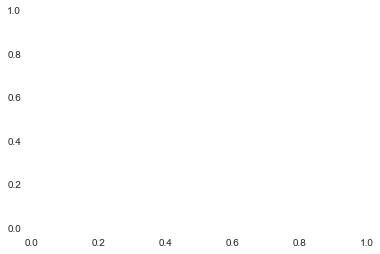

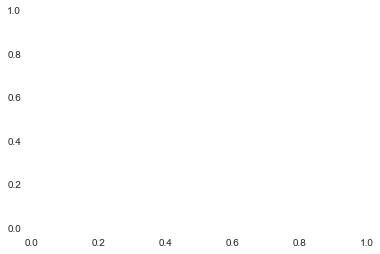

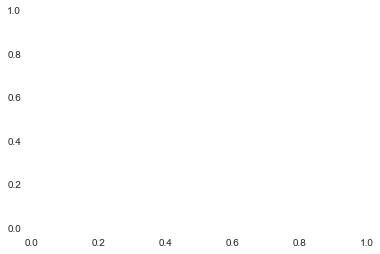

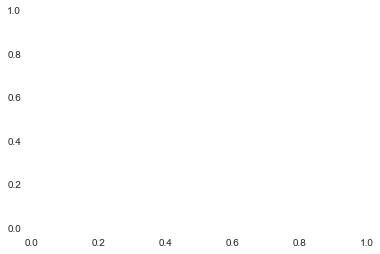

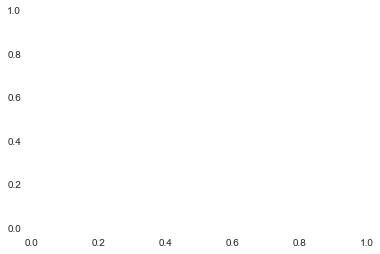

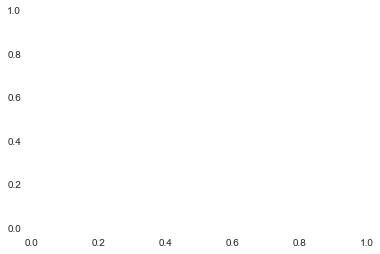

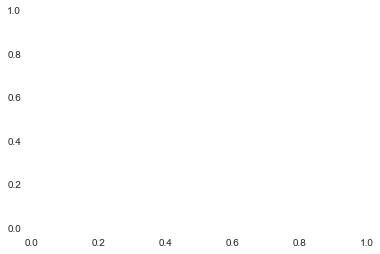

In [235]:
for i in dfTypes.unique():    
    df_testing = df_count_year_month_type[df_count_year_month_type['type'] == i]
    try: 
        a = len(pacf_yw(df_testing['count'], nlags=36,method='mle'))
        name = i +' ('+ str(a) +')'
        #print(name)
        plot_acf(df_testing['count'],lags=12,title=name); 
    except: 
        a=1
        #print('erro no ',name)
        



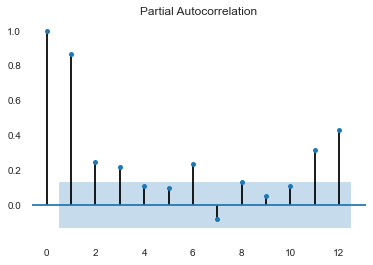

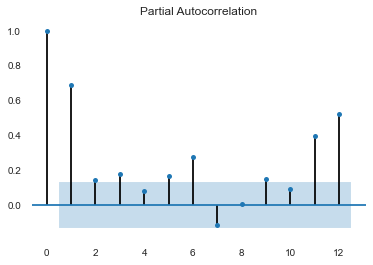

In [178]:
plot_pacf(df_YM_Agravo['count'],lags=12);
plot_pacf(df_YM_Apelacao['count'],lags=12);


<div class="alert alert-info"><h2> ARIMA
</h2>
    <hr/>
    
</div>

In [238]:
from statsmodels.tsa.ar_model  import AR, ARResults

In [346]:
for i in dfTypes.unique()[0:3]:    
    df_count_year_month_type[df_count_year_month_type['type'] == i]
    print(i)


dfYM = df_count_year_month_type[df_count_year_month_type['type'] == 'Apelação Cível']


Apelação Cível
Agravo de Instrumento
Embargos de Declaração


In [274]:
tamanhoDataSet =len(dfYM['count'])
refTeste = (len(dfYM['count'])*(1/10))*3
refTreino = tamanhoDataSet-refTeste
print(tamanhoDataSet,refTeste,refTreino)

215 64.5 150.5


In [358]:
trainYM = dfYM.iloc[:150]
testYM = dfYM.iloc[150:]

const       1666.101757
L1.count       0.142465
L2.count       0.008085
dtype: float64
const       1666.101757
L1.count       0.142465
L2.count       0.008085
dtype: float64
const       1666.101757
L1.count       0.142465
L2.count       0.008085
dtype: float64
6004648.174271077
6004648.174271077
6004648.174271077


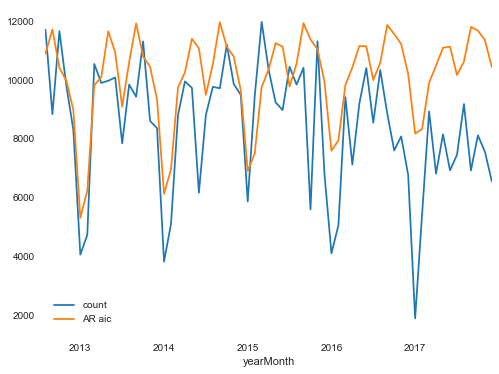

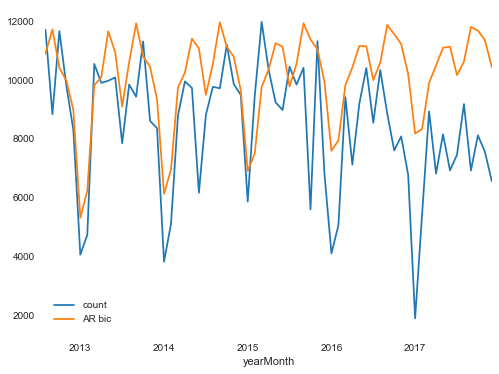

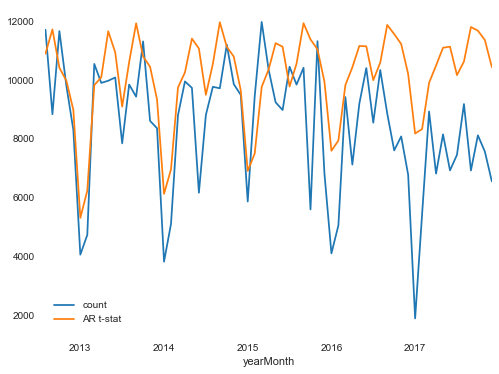

In [398]:
from sklearn.metrics import mean_squared_error
predictionsArr = []
ic = ['aic','bic','t-stat']

for icItem in ic:    
    model = AR(trainYM['count'])
    AR1fit = model.fit(ic=icItem) #max_lag=12
    #AR1fit = model.fit(max_lag=icItem)
    print(AR1fit.params[0:3])
    start = len(trainYM)
    end = len(trainYM) + len(testYM)-1
    trainYM.index.freq = 'MS'
    testYM.index.freq = 'MS'
    predictionsYM = AR1fit.predict(start=start,end=end)
    predictionsYM = predictionsYM.rename('AR '+ str(icItem))
    predictionsArr.append(predictionsYM)
    
for pred in predictionsArr:
    testYM.plot(figsize=(8,6), legend=True)
    pred.plot(legend=True);
    error = mean_squared_error(testYM['count'],pred)
    print(error)
    


In [404]:
#FORECASTING
model = AR(dfYM['count'])
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(dfYM),end=len(dfYM)+24).rename('Forecast')

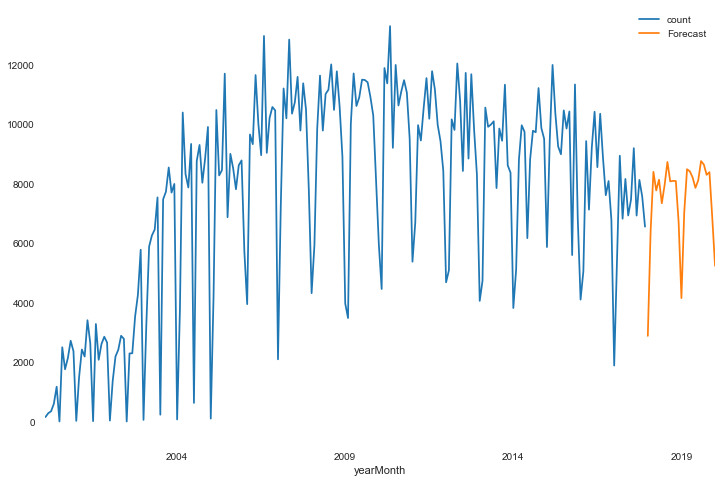

In [406]:
dfYM['count'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)


<div class="alert alert-warning"><span> Precisa-se entender os dados.<br>
        Saber tendencia, estacionariedade (Um processo estacionário tem a propriedade de que a média, variância e estrutura de autocorrelação não mudam no decorrer do tempo.)<br>
    Para fazer isso matematicamente usa-se Dickey-Fuller test. <br>
    Se p-value for menor do que "<" 0.05 rejeita-se a hipotese nula e assume que o data set é estacionário.
    </span>
    <hr/>
    
</div>


<div class="alert alert-warning"><span> Granger Causality Test<br>
        Testa se o teste de hipotese para determina se uma serie temporal é util em prever outra. Também conhecida como Causalidade. 
           </span>    
    <p>Outros itens para avaliar predição já vistos:</p>
    <ul>
        <li>MAE - mean average error</li>
        <li>MSE - mean squared error</li>
        <li>RMSE -  root mean squared error</li>
    </ul>
    <hr/>
    <p>ainda não vistos:</p>
    <ul>
        <li>AIC - akaike</li>
        <ul><li>Muito usado, ele ajuda a medir a eficiência de modelos. Modelos mais complexos que possuem infimo ganho e utilizam muitos parâmetros e não dao retorno esperado são penalizados. </li></ul>
        <li>BIC - Bayes
             <ul><li>Parecido com Akaike utiliza apenas uma matematica bayesiana como diferencial </li></ul>
        </li>        
    </ul>
    
</div>

In [409]:
dfYM = df_count_year_month_type[df_count_year_month_type['type'] == 'Apelação Cível']

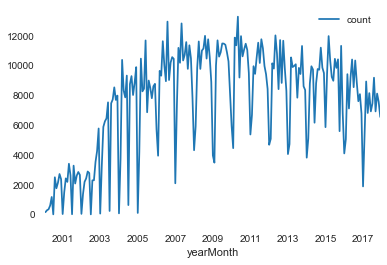

In [410]:
dfYM.plot()

In [412]:
from statsmodels.tsa.stattools import adfuller

In [425]:
dfTest =  adfuller(dfYM['count'])
dfout = pd.Series(dfTest[0:4],index=['ADF Test Statistics','p-value','#Lags used','#observations'])

for key,val in dfTest[4].items():
    dfout[f'critical value ({key})'] = val
display(pd.DataFrame(dfout))

,0
ADF Test Statistics,-2.433313
p-value,0.132554
#Lags used,14.000000
#observations,200.000000
critical value (1%),-3.463476
critical value (5%),-2.876102
critical value (10%),-2.574532


In [547]:
from statsmodels.tsa.stattools import adfuller

def adf_teste(series,title='',prints=False):    
    if prints:
        print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC',) 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    if prints:
        display(pd.DataFrame(out))
    
    if prints:
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis")
            print("Reject the null hypothesis")
            print("Data has no unit root and is stationary")
        else:
            print("Weak evidence against the null hypothesis")
            print("Fail to reject the null hypothesis")
            print("Data has a unit root and is non-stationary")
    return(result[1],title,out) 

In [548]:
adf_teste(dfYM['count'])

(0.1325539922945616,
 '',
 ADF test statistic       -2.433313
 p-value                   0.132554
 # lags used              14.000000
 # observations          200.000000
 critical value (1%)      -3.463476
 critical value (5%)      -2.876102
 critical value (10%)     -2.574532
 dtype: float64)

In [549]:
df_count_year_month_type[df_count_year_month_type['type']=='Agravo'].groupby(['type']).agg(total=('count','sum')).reset_index()['total'].item()

420130

In [554]:
dicionario = []
for i in dfTypes.unique():    
    try:
        dfToTest = df_count_year_month_type[df_count_year_month_type['type'] == i]
        quantidadeAmostras = df_count_year_month_type[df_count_year_month_type['type']==i].groupby(['type']).agg(total=('count','sum')).reset_index()['total'].item()
        #quantidadeAmostras = dfToTest.groupby('type').agg({'sum':'count'})['count']
        #print(quantidadeAmostras)
        pvalue, titulo,out = adf_teste(dfToTest['count'],i)
        nomeGraph = titulo + '(' + str(quantidadeAmostras) +')'
        dicionario.append({'titulo':nomeGraph,'p-value':pvalue,'QtdItens':quantidadeAmostras,'Info':out})
    except:
        print('erro em ',i)
    #print(pvalue,titulo)
    
dfResultPvalue = pd.DataFrame(dicionario).reset_index()
print(dfResultPvalue.columns)

erro em  Processo de Execução
erro em  Impugnação ao Cumprimento de Sentença
erro em  Impugnação
erro em  Suspensão de Execução de Sentença
erro em  Medidas Protetivas de Urgencia
erro em  Incidente de Assunção de Competência
erro em  Pedido Suspensão Liminar
erro em  Cautelar Incidental
erro em  Recurso Inominado
erro em  Embargos de Terceiros
erro em  Declaratória de Constitucionalidade
erro em  Crime Responsabilidade Funcionário Publico
erro em  Agravo em Rec
erro em  Liquidação Provisória por Artigos
erro em  Pedido de Arquivamento
erro em  Interpelação Judicial
erro em  Embargos
erro em  Incidente de Prevenção ou Composição de Divergência
erro em  Interpelação
erro em  Agravo de Instrumento em Recurso Extraordinario
erro em  Outras Medidas Provisionais
erro em  Notificação Para Explicações
erro em  Arresto
erro em  Declaração de Inconstitucionalidade
erro em  Recurso de Agravo
erro em  Oposição
erro em  Arresto Hipoteca Legal
Index(['index', 'titulo', 'p-value', 'QtdItens', 'Info'


<div class="alert alert-info"><h1>Grafico P-value, por quantidade de processos por tipo de processo </h1>
    <hr/>
    
</div>

In [561]:
fig = px.scatter(dfResultPvalue[dfResultPvalue['p-value']>0.05],'titulo','p-value',color='QtdItens',hover_data=['Info'])
fig.show(title='teste')

In [ ]:
df_count_year_month_type[df_count_year_month_type['type']=='Cautelar Inominada'].plot() #P-value 0.00712
df_count_year_month_type[df_count_year_month_type['type']=='Petição'].plot() #P-value = 0.96 


#pq a de cima o P-value foi tao baixo, pode ser interpretado só olhando o grafico?


<div class="alert alert-info"><h2> SARIMA
</h2>
        <hr/>
    
</div>


<div class="alert alert-info"><h2> VAR - Vector Autoregression
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> VARMA - Vector Autoregression Moving Average
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> Deep learning - LSTMS - GRU 
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> RNN
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> Facebook Prophet Library
</h2>
    <hr/>
    
</div>